<a href="https://colab.research.google.com/github/phuclhp1922/VGU-AI_Lab-Dr.Cuong/blob/main/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Allow Google Drive access
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import library
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from nltk.tokenize import TweetTokenizer
from collections import defaultdict

In [ ]:
# Read dataset
dataset_path = "/content/drive/MyDrive/Colab Notebooks/Deep Learning/Basic/AI VIET NAM/Logistic Regression/sentiment_analysis.csv"
df = pd.read_csv (dataset_path, index_col="id")

In [ ]:
# Remove uesless stuff
def text_normalize(text):
  text = re.sub(r'^RT [\s]+', '', text)
  text = re.sub(r'https ?:\/\/.*[\ r\n]*', '', text)
  text = re.sub(r'#', '', text)
  text = re.sub(r'[^\w\s]', '', text)

  tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)

  text_tokens = tokenizer.tokenize(text)

  return text_tokens

In [ ]:
def get_freqs(df):
  freqs = defaultdict(lambda: 0)
  for idx, row in df.iterrows():
    tweet = row['tweet']
    label = row['label']
    tokens = text_normalize(tweet)
    for token in tokens:
      pair = (token, label)
      freqs[pair] += 1

  return freqs

In [ ]:
def get_feature(text, freqs):
  tokens = text_normalize(text)

  X = np.zeros(3)
  X[0] = 1

  for token in tokens:
    X[1] += freqs[(token, 0)]
    X[2] += freqs[(token, 1)]

  return X

In [ ]:
# Extract feature
X = []
y = []

freqs = get_freqs(df)
for idx, row in df.iterrows():
  tweet = row['tweet']
  label = row['label']

  X_i = get_feature(tweet, freqs)

  X.append(X_i)
  y.append(label)

X = np.array(X)
y = np.array(y)

In [ ]:
# Divide train, test, and val set
val_size = 0.2
test_size = 0.125
random_state = 2

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=val_size, random_state=random_state, shuffle=True)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=test_size, random_state=random_state, shuffle=True)

In [ ]:
# Standardize
normalizer = StandardScaler()

X_train[:, 1:] = normalizer.fit_transform(X_train[: , 1:])
X_val[:, 1:] = normalizer.transform(X_val[: , 1:])
X_test[:, 1:] = normalizer.transform(X_test[: , 1:])

In [ ]:
# Define commonly used function
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

def predict(X, theta):
  dot_product = np.dot(X, theta)
  y_hat = sigmoid(dot_product)
  return y_hat

def compute_loss(y_hat, y):
  y_hat = np.clip(y_hat, 1e-7, 1 - 1e-7)
  return (-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)).mean()

def compute_gradient(X, y, y_hat):
  return np.dot(X.T, (y_hat - y)) / y.size

def update_theta(theta, gradient, lr):
  return theta - lr * gradient

def compute_accuracy(X, y, theta):
  y_hat = predict(X, theta).round()
  acc = (y_hat == y).mean()

  return acc

In [ ]:
# Hyper-parameter
lr = 0.01
epochs = 100
batch_size = 128

np.random.seed(random_state)
theta = np.random.uniform(size=X_train.shape[1])

In [ ]:
# Train model
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
  train_batch_accs = []
  train_batch_losses = []
  val_batch_accs = []
  val_batch_losses = []

  for i in range(0, X_train.shape[0], batch_size):
    X_i = X_train[i:i+batch_size]
    y_i = y_train[i:i+batch_size]

    y_hat = predict(X_i, theta)

    train_loss = compute_loss(y_hat, y_i)
    train_batch_losses.append(train_loss)

    gradient = compute_gradient(X_i, y_i, y_hat)
    theta = update_theta(theta, gradient, lr)

    train_acc = compute_accuracy(X_train, y_train, theta)
    train_batch_accs.append(train_acc)

    y_val_hat = predict(X_val, theta)
    val_loss = compute_loss(y_val_hat, y_val)
    val_batch_losses.append(train_loss)

    val_acc = compute_accuracy(X_val, y_val, theta)
    val_batch_accs.append(val_acc)

  train_batch_loss = sum(train_batch_losses)/ len(train_batch_losses)
  val_batch_loss = sum(val_batch_losses) / len(val_batch_losses)
  train_batch_acc = sum(train_batch_accs) / len(train_batch_accs)
  val_batch_acc = sum(val_batch_accs) / len(val_batch_accs)

  train_losses.append(train_batch_loss)
  val_losses.append(val_batch_loss)
  train_accs.append(train_batch_acc)
  val_accs.append(val_batch_acc)

  print (f'\ nEPOCH { epoch + 1}:\ Training loss : { train_batch_loss :.3f}\tValidation loss : { val_batch_loss :.3f}')

\ nEPOCH 1:\ Training loss : 0.710	Validation loss : 0.710
\ nEPOCH 2:\ Training loss : 0.664	Validation loss : 0.664
\ nEPOCH 3:\ Training loss : 0.626	Validation loss : 0.626
\ nEPOCH 4:\ Training loss : 0.595	Validation loss : 0.595
\ nEPOCH 5:\ Training loss : 0.570	Validation loss : 0.570
\ nEPOCH 6:\ Training loss : 0.548	Validation loss : 0.548
\ nEPOCH 7:\ Training loss : 0.531	Validation loss : 0.531
\ nEPOCH 8:\ Training loss : 0.516	Validation loss : 0.516
\ nEPOCH 9:\ Training loss : 0.503	Validation loss : 0.503
\ nEPOCH 10:\ Training loss : 0.492	Validation loss : 0.492
\ nEPOCH 11:\ Training loss : 0.483	Validation loss : 0.483
\ nEPOCH 12:\ Training loss : 0.475	Validation loss : 0.475
\ nEPOCH 13:\ Training loss : 0.468	Validation loss : 0.468
\ nEPOCH 14:\ Training loss : 0.462	Validation loss : 0.462
\ nEPOCH 15:\ Training loss : 0.457	Validation loss : 0.457
\ nEPOCH 16:\ Training loss : 0.452	Validation loss : 0.452
\ nEPOCH 17:\ Training loss : 0.448	Validation lo

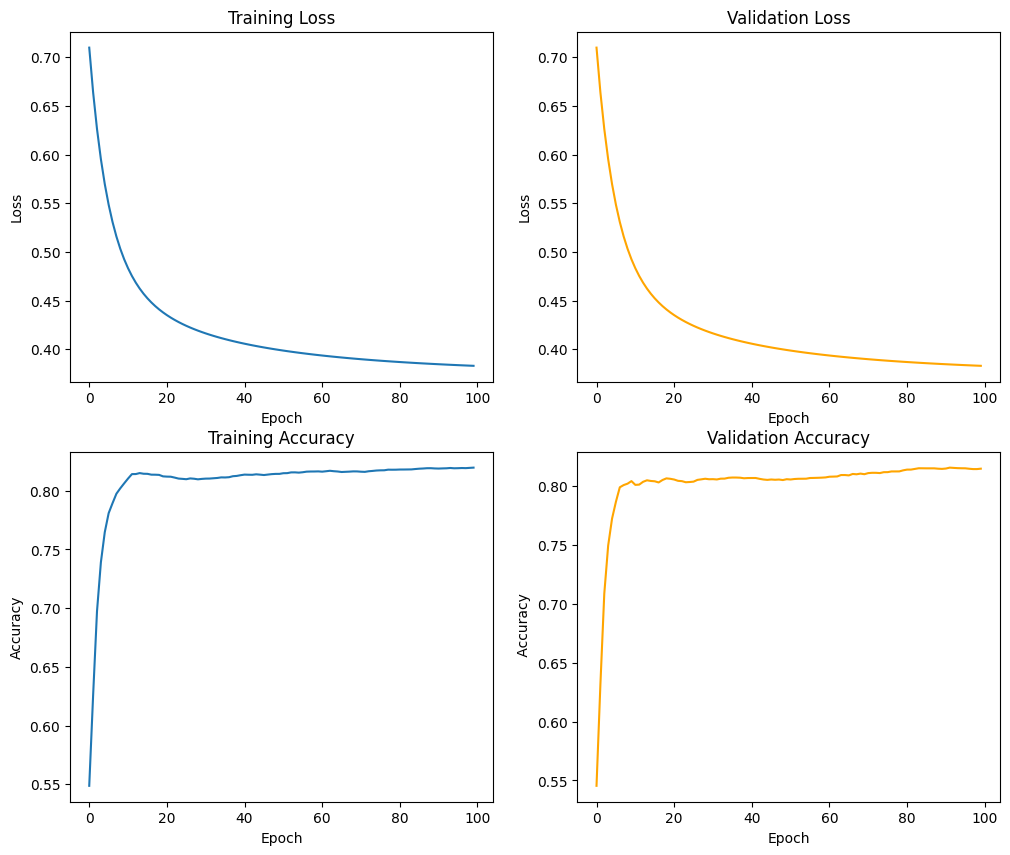

In [ ]:
# Plot train + val loss and accuracy
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training Loss')

ax[0, 1].plot(val_losses, 'orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')

ax[1, 0].plot(train_accs)
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')

ax[1, 1].plot(val_accs, 'orange')
ax[1, 1].set(xlabel='Epoch', ylabel=' Accuracy')
ax[1, 1].set_title('Validation Accuracy')

plt.show()

In [ ]:
val_set_acc = compute_accuracy(X_val, y_val, theta)
test_set_acc = compute_accuracy(X_test, y_test, theta)
print('Evaluation on validation and test set:')
print(f'Accuracy : { val_set_acc }')
print(f'Accuracy : { test_set_acc }')

Evaluation on validation and test set:
Accuracy : 0.8150252525252525
Accuracy : 0.8320707070707071
